# Movie Poster Genere  in Colab

### as you can see current ram is 12GB only, to increase it run below code

In [ ]:
i = []
while True:
  i.append(i)

In [ ]:
# wait for few minutes, after that you will get a prompt that your notebook got crashed, do you want to increase ram ?

In [ ]:
# in the prompt click - yes

#### as you see the ram increase from 12GB to 25GB

## Installing tensorflow

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 16kB/s 


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 61.35 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [6]:
data = pd.read_csv('Movies-Poster_Dataset/train.csv')

In [7]:
data.shape

(7254, 27)

In [8]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
img_width =350
img_height=350

x=[]

for i in tqdm(range(data.shape[0])):
    path='/content/Movies-Poster_Dataset/Images/'+data['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(img_width,img_height,3))
    img= image.img_to_array(img)
    img = img/255.0
    x.append(img)
x = np.array(x)

100%|██████████| 7254/7254 [00:34<00:00, 213.33it/s]


In [10]:
x.shape

(7254, 350, 350, 3)

In [11]:
from numpy import save
save('x_train.npy',x )

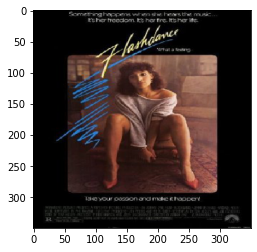

In [12]:
plt.imshow(x[1])

In [13]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [14]:
y=data.drop(['Id','Genre'], axis=1)

In [15]:
x_train,x_test,y_train, y_test= train_test_split(x,y,random_state=0,test_size=0.15)

## Building CNN Model

In [18]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))Adventure
Animation
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)       

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [22]:
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
193/193 [==============================] - 177s 916ms/step - loss: 0.3986 - accuracy: 0.2141 - val_loss: 0.2506 - val_accuracy: 0.1910
Epoch 2/5
193/193 [==============================] - 176s 915ms/step - loss: 0.2688 - accuracy: 0.2863 - val_loss: 0.2394 - val_accuracy: 0.2140
Epoch 3/5
193/193 [==============================] - 184s 952ms/step - loss: 0.2551 - accuracy: 0.2983 - val_loss: 0.2364 - val_accuracy: 0.2176
Epoch 4/5
193/193 [==============================] - 182s 943ms/step - loss: 0.2468 - accuracy: 0.3144 - val_loss: 0.2395 - val_accuracy: 0.2121
Epoch 5/5
193/193 [==============================] - 179s 926ms/step - loss: 0.2431 - accuracy: 0.3262 - val_loss: 0.2379 - val_accuracy: 0.2130


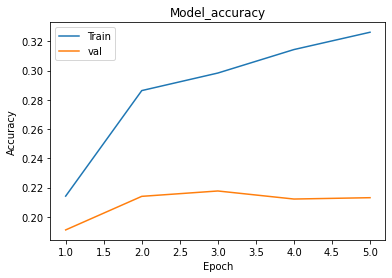

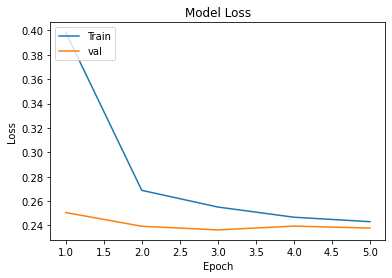

In [23]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history, 5)

Action
Adventure
Animation


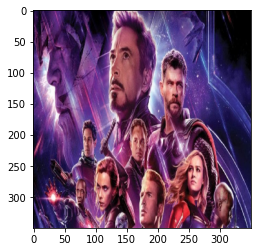

In [26]:
img = image.load_img('/content/Movies-Poster_Dataset/endgame.jpg', target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img=img/225.0
img =img.reshape(1, img_width, img_height,3)
classes = data.columns[2:]
y_prob=model.predict(img)
top_3_pred = np.argsort(y_prob[0][:-4:-1])
for i in range(3):
  print(classes[top_3_pred[i]])